In [1]:
# Most cases by TYPE
# Most cases by LOCATION
# Most cases by Season
# Seasons when more cases are resolved
# Time taken to resolve cases
# Correlate TYPE and LOCATION
# search for covid keywords in complaints (Masks, social distancing, etc)
# compare resolution time of covid and non covid cases
# Sentiment analysis of complaints
# Sentiment analysis based on TYPE
# Sentiment analysis based on LOCATION
# Sentiment analysis using ecometric data (ethinicity). Use Census tract data from Harvard Dataverse to identify ethnicity
# Sentiment analysis to classify liberal and conservative (conservative have strong opinions)

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Read data from csv
pre_covid_records = pd.read_csv('data\\311_Cases_2015_2019_Unrestricted.csv')
post_covid_records = pd.read_csv('data\\311_Cases_2020_2024_Unrestricted.csv')

# print(pre_covid_records.columns)
# ['Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION',
#        'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT', 'LocationID', 'X', 'Y',
#        'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD',
#        'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI',
#        'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM']

In [4]:
def parse_date(dateStr: str):
    return dt.datetime.strptime(dateStr, '%Y-%m-%d')

In [5]:
pre_covid_records['OPEN_DAY'] = pre_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).day)
pre_covid_records['OPEN_MONTH'] = pre_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).month)
pre_covid_records['OPEN_YEAR'] = pre_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).year)


post_covid_records['OPEN_DAY'] = post_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).day)
post_covid_records['OPEN_MONTH'] = post_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).month)
post_covid_records['OPEN_YEAR'] = post_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).year)

In [6]:
def group_and_count(df, groupingColumn):
    df = df.groupby(groupingColumn)['CASE_ENQUIRY_ID'].nunique().reset_index(name='COUNT') \
        .sort_values(['COUNT'], ascending = False)
    df['Percentage'] = df['COUNT'] / df['COUNT'].sum() * 100
    return df

In [7]:
# Count each type of request and arrange them in decreasing order
pre_covid_type = group_and_count(pre_covid_records, 'TYPE')
print("Top 10 most common requests during 2015-2019")
top_10_types_pre_covid = pre_covid_type.head(10)
top_10_types_pre_covid

Top 10 most common requests during 2015-2019


,TYPE,COUNT,Percentage
59,General Request,175288,12.344651
127,Parking Enforcement,152303,10.725934
160,Requests for Street Cleaning,83461,5.877738
97,Missed Trash/Recycling/Yard Waste/Bulk Item,65984,4.646921
155,Request for Pothole Repair,59999,4.225427
167,Schedule a Bulk Item Pickup,57681,4.062182
80,Improper Storage of Trash (Barrels),52812,3.719283
157,Request for Snow Plowing,41207,2.902002
25,CE Collection,37325,2.628612
187,Street Light Outages,36854,2.595442


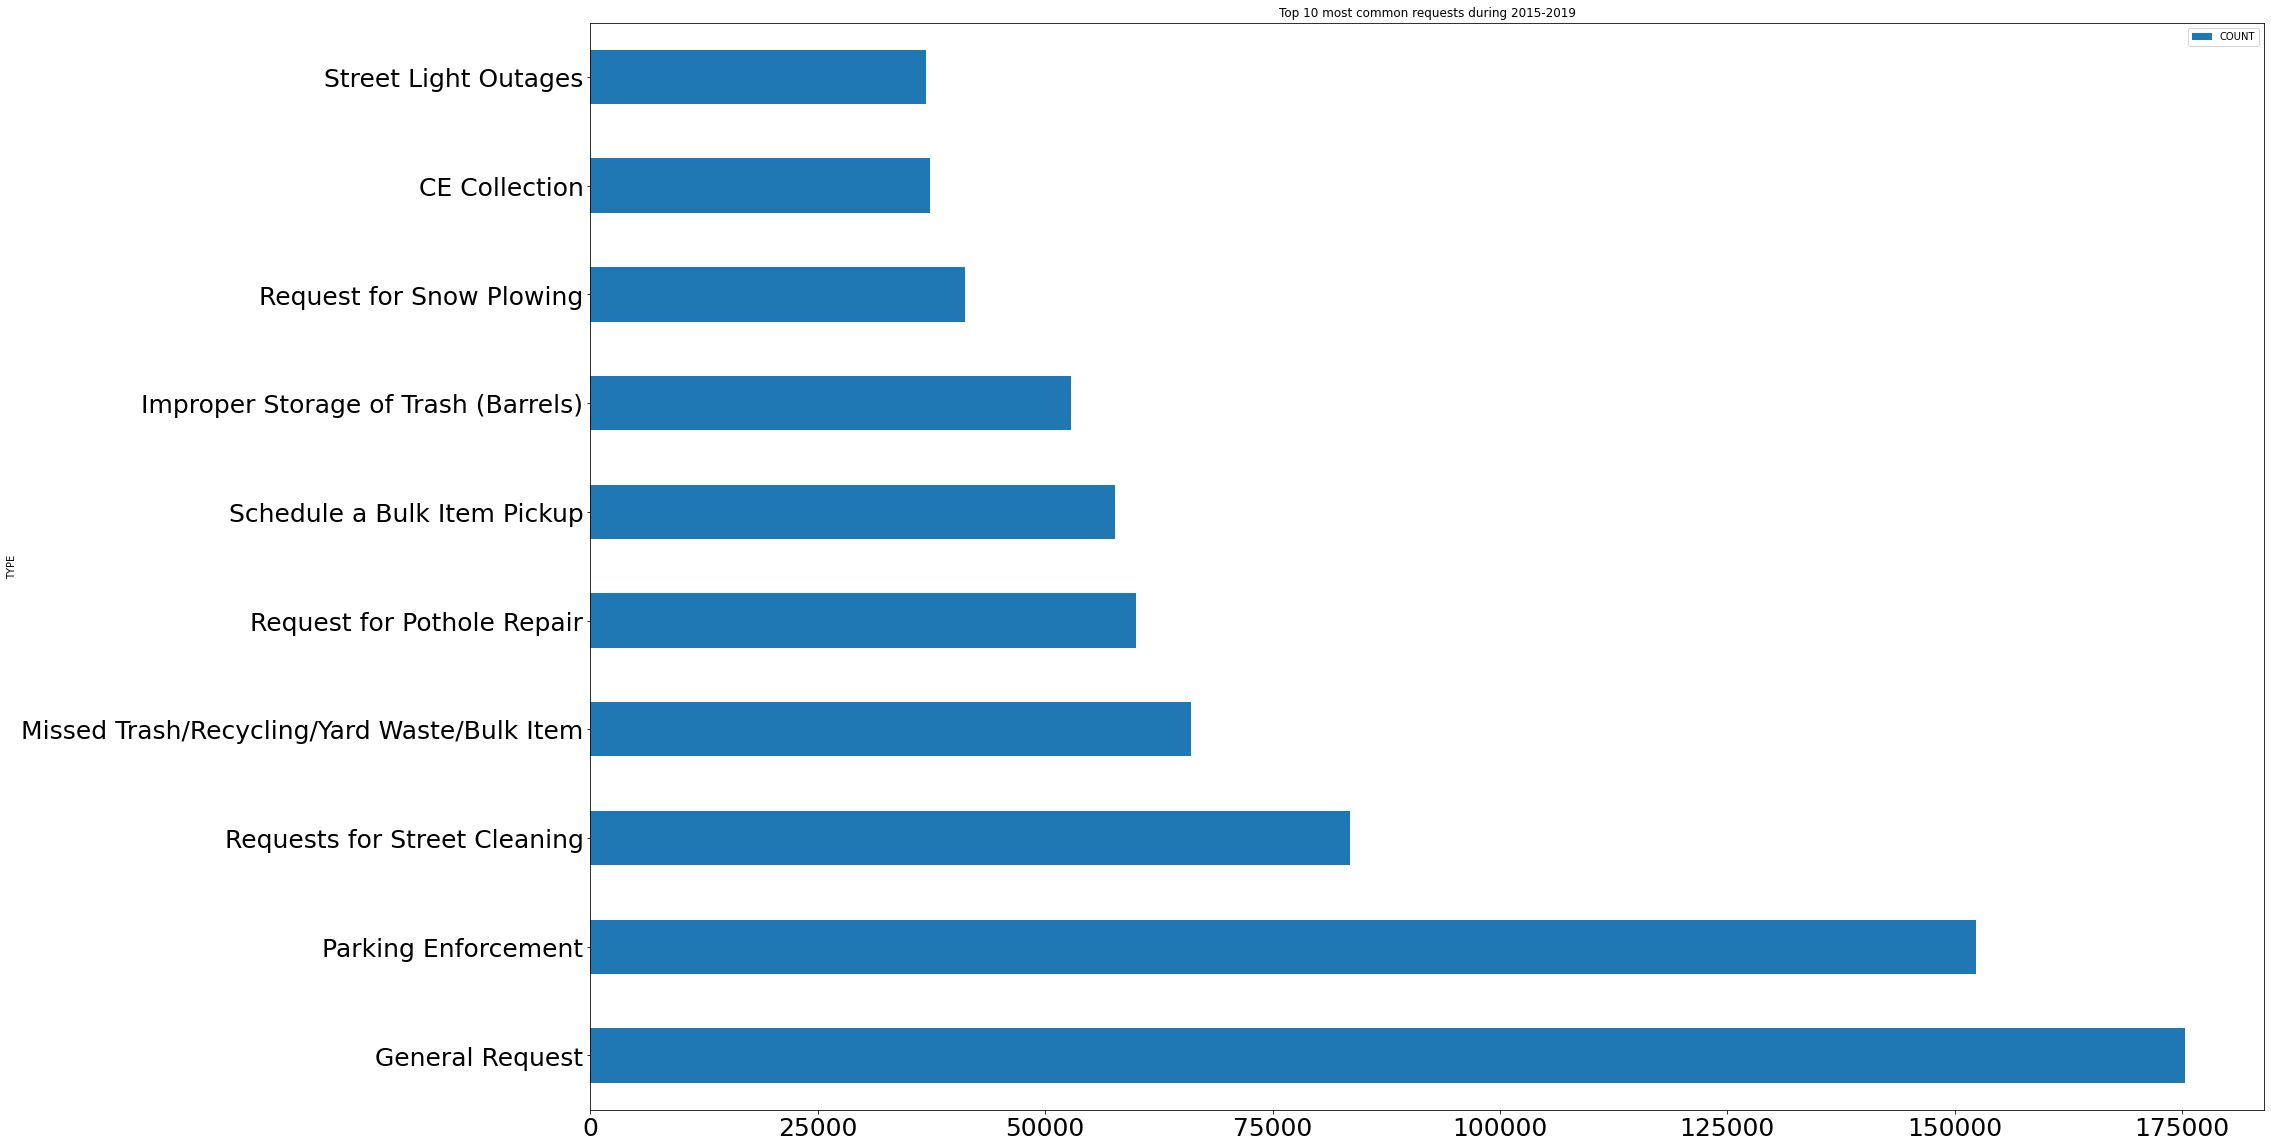

In [8]:
top_10_plot_pre_covid = top_10_types_pre_covid.plot.barh(x='TYPE', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 most common requests during 2015-2019")

In [9]:
post_covid_type = group_and_count(post_covid_records, 'TYPE')
print("\nTop 10 most common requests during 2020-2021")
top_10_types_post_covid = post_covid_type.head(10)
top_10_types_post_covid


Top 10 most common requests during 2020-2021


,TYPE,COUNT,Percentage
48,General Request,51047,16.839692
102,Parking Enforcement,38263,12.622429
133,Requests for Street Cleaning,18129,5.980504
82,Needle Pickup,14107,4.653702
140,Schedule a Bulk Item Pickup,13525,4.461708
64,Improper Storage of Trash (Barrels),11947,3.941148
78,Missed Trash/Recycling/Yard Waste/Bulk Item,11650,3.843172
128,Request for Pothole Repair,9460,3.120722
22,CE Collection,9146,3.017138
129,Request for Recycling Cart,8171,2.695499


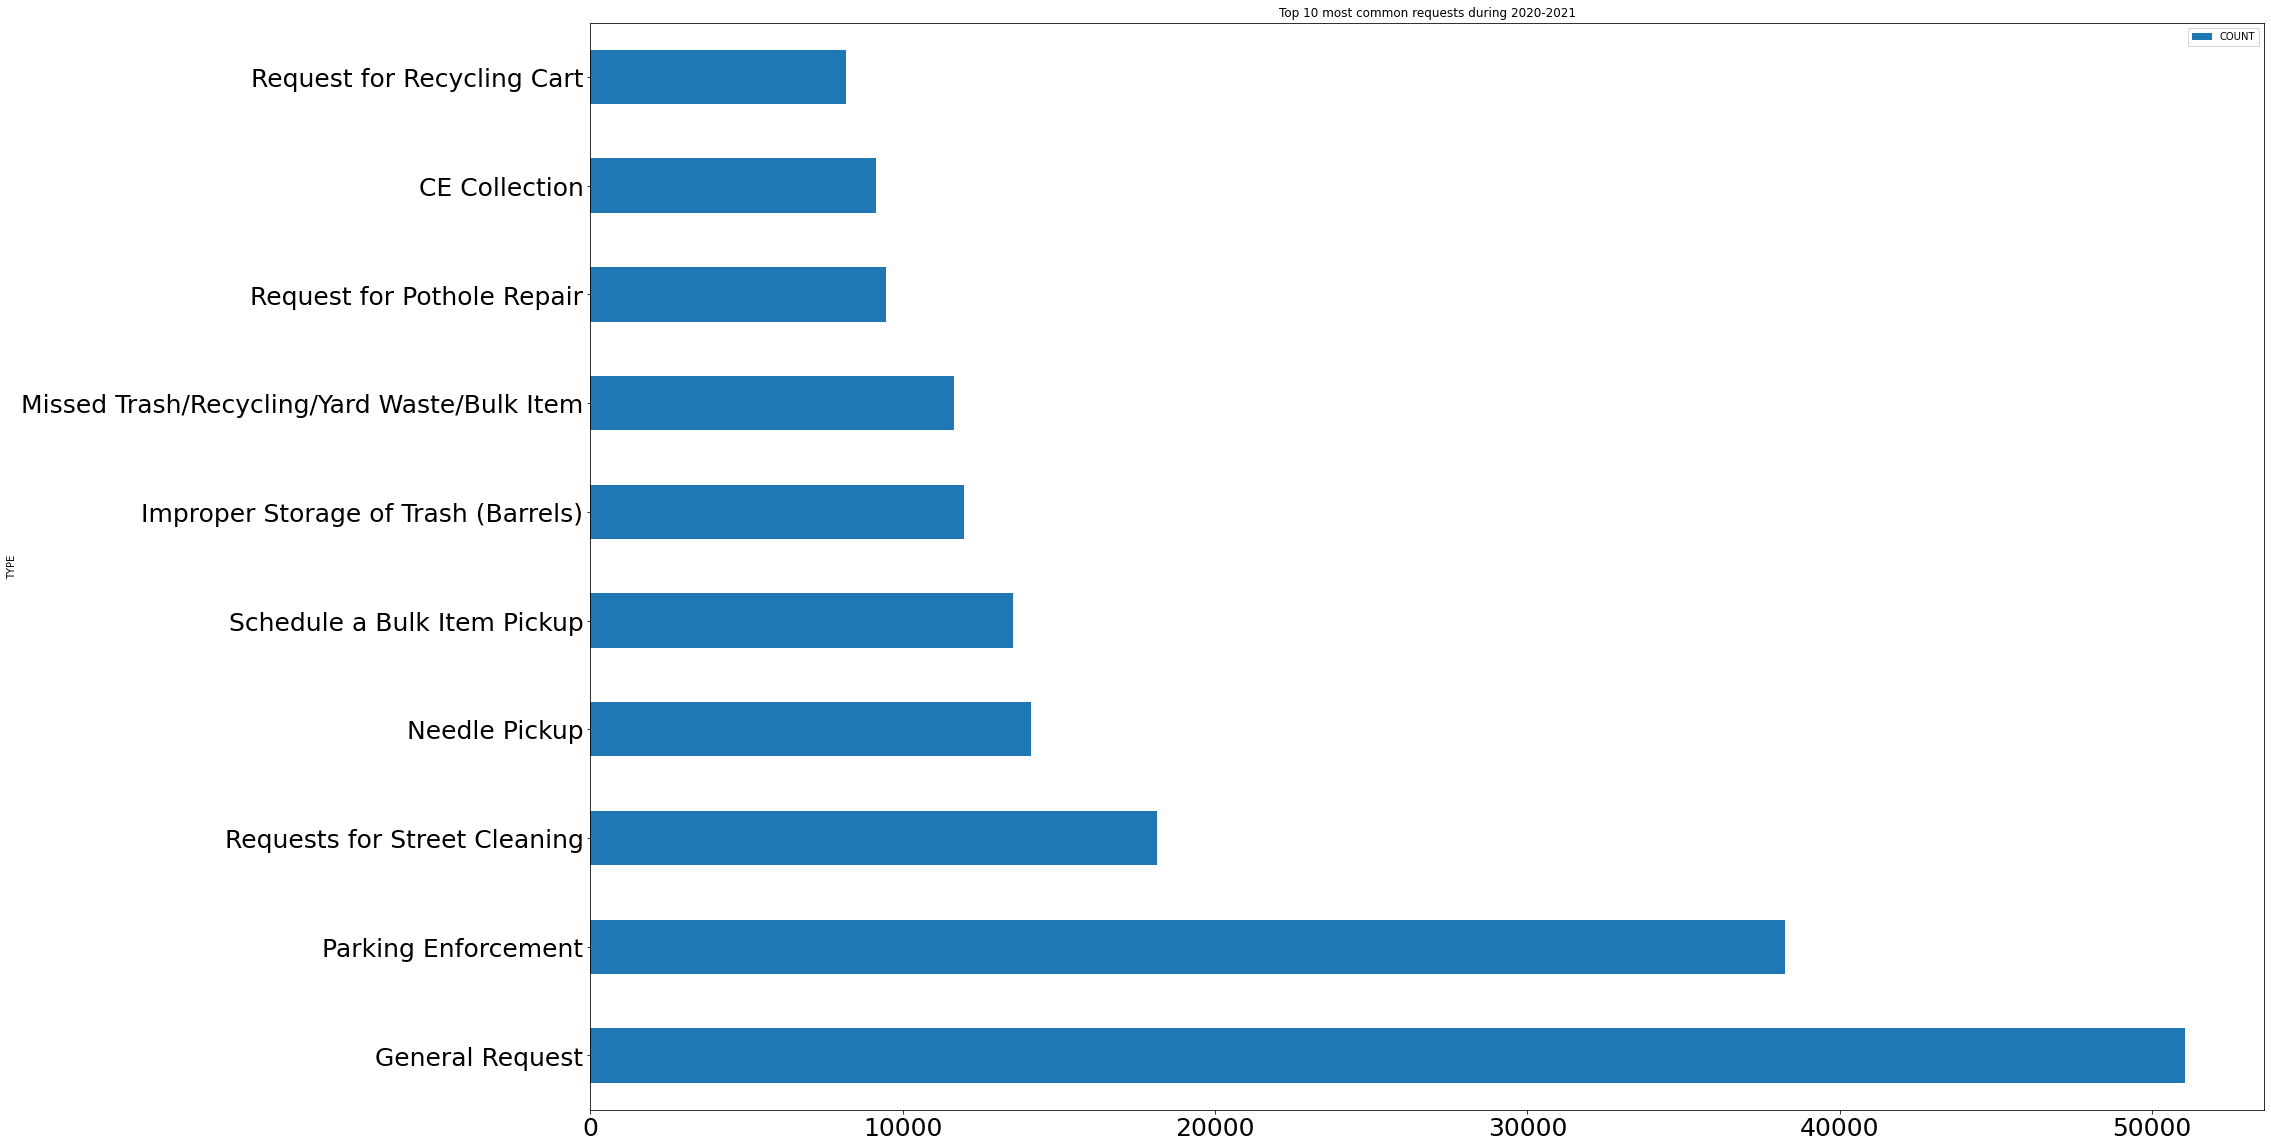

In [10]:
top_10_plot_post_covid = top_10_types_post_covid.plot.barh(x='TYPE', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 most common requests during 2020-2021")

In [11]:
#print(post_covid_records.head(1))

In [12]:
pre_covid_location = group_and_count(pre_covid_records, 'LOCATION')
print("Top 10 locations with highest number of complaints during 2015-2019")
top_10_locations_pre_covid = pre_covid_location.head(10)
top_10_locations_pre_covid

Top 10 locations with highest number of complaints during 2015-2019


,LOCATION,COUNT,Percentage
783,"1 City Hall Plz, Boston, MA 02108",4792,0.348709
3763,"100 City Hall Plz, Boston, MA 02108",1376,0.100130
124146,"INTERSECTION of Cross St & Hanover St, Boston,...",585,0.042570
128420,INTERSECTION of Massachusetts Ave & Melnea Cas...,569,0.041406
128415,INTERSECTION of Massachusetts Ave & Huntington...,494,0.035948
122022,"INTERSECTION of Boylston St & Park Dr, Boston,...",466,0.033910
106112,"75 W Rutland Sq, Roxbury, MA 02118",443,0.032237
18094,"139 Tremont St, Boston, MA 02108",421,0.030636
24222,"1530 Washington St, Roxbury, MA 02118",410,0.029835
24241,"1535 Washington St, Roxbury, MA 02118",408,0.029690


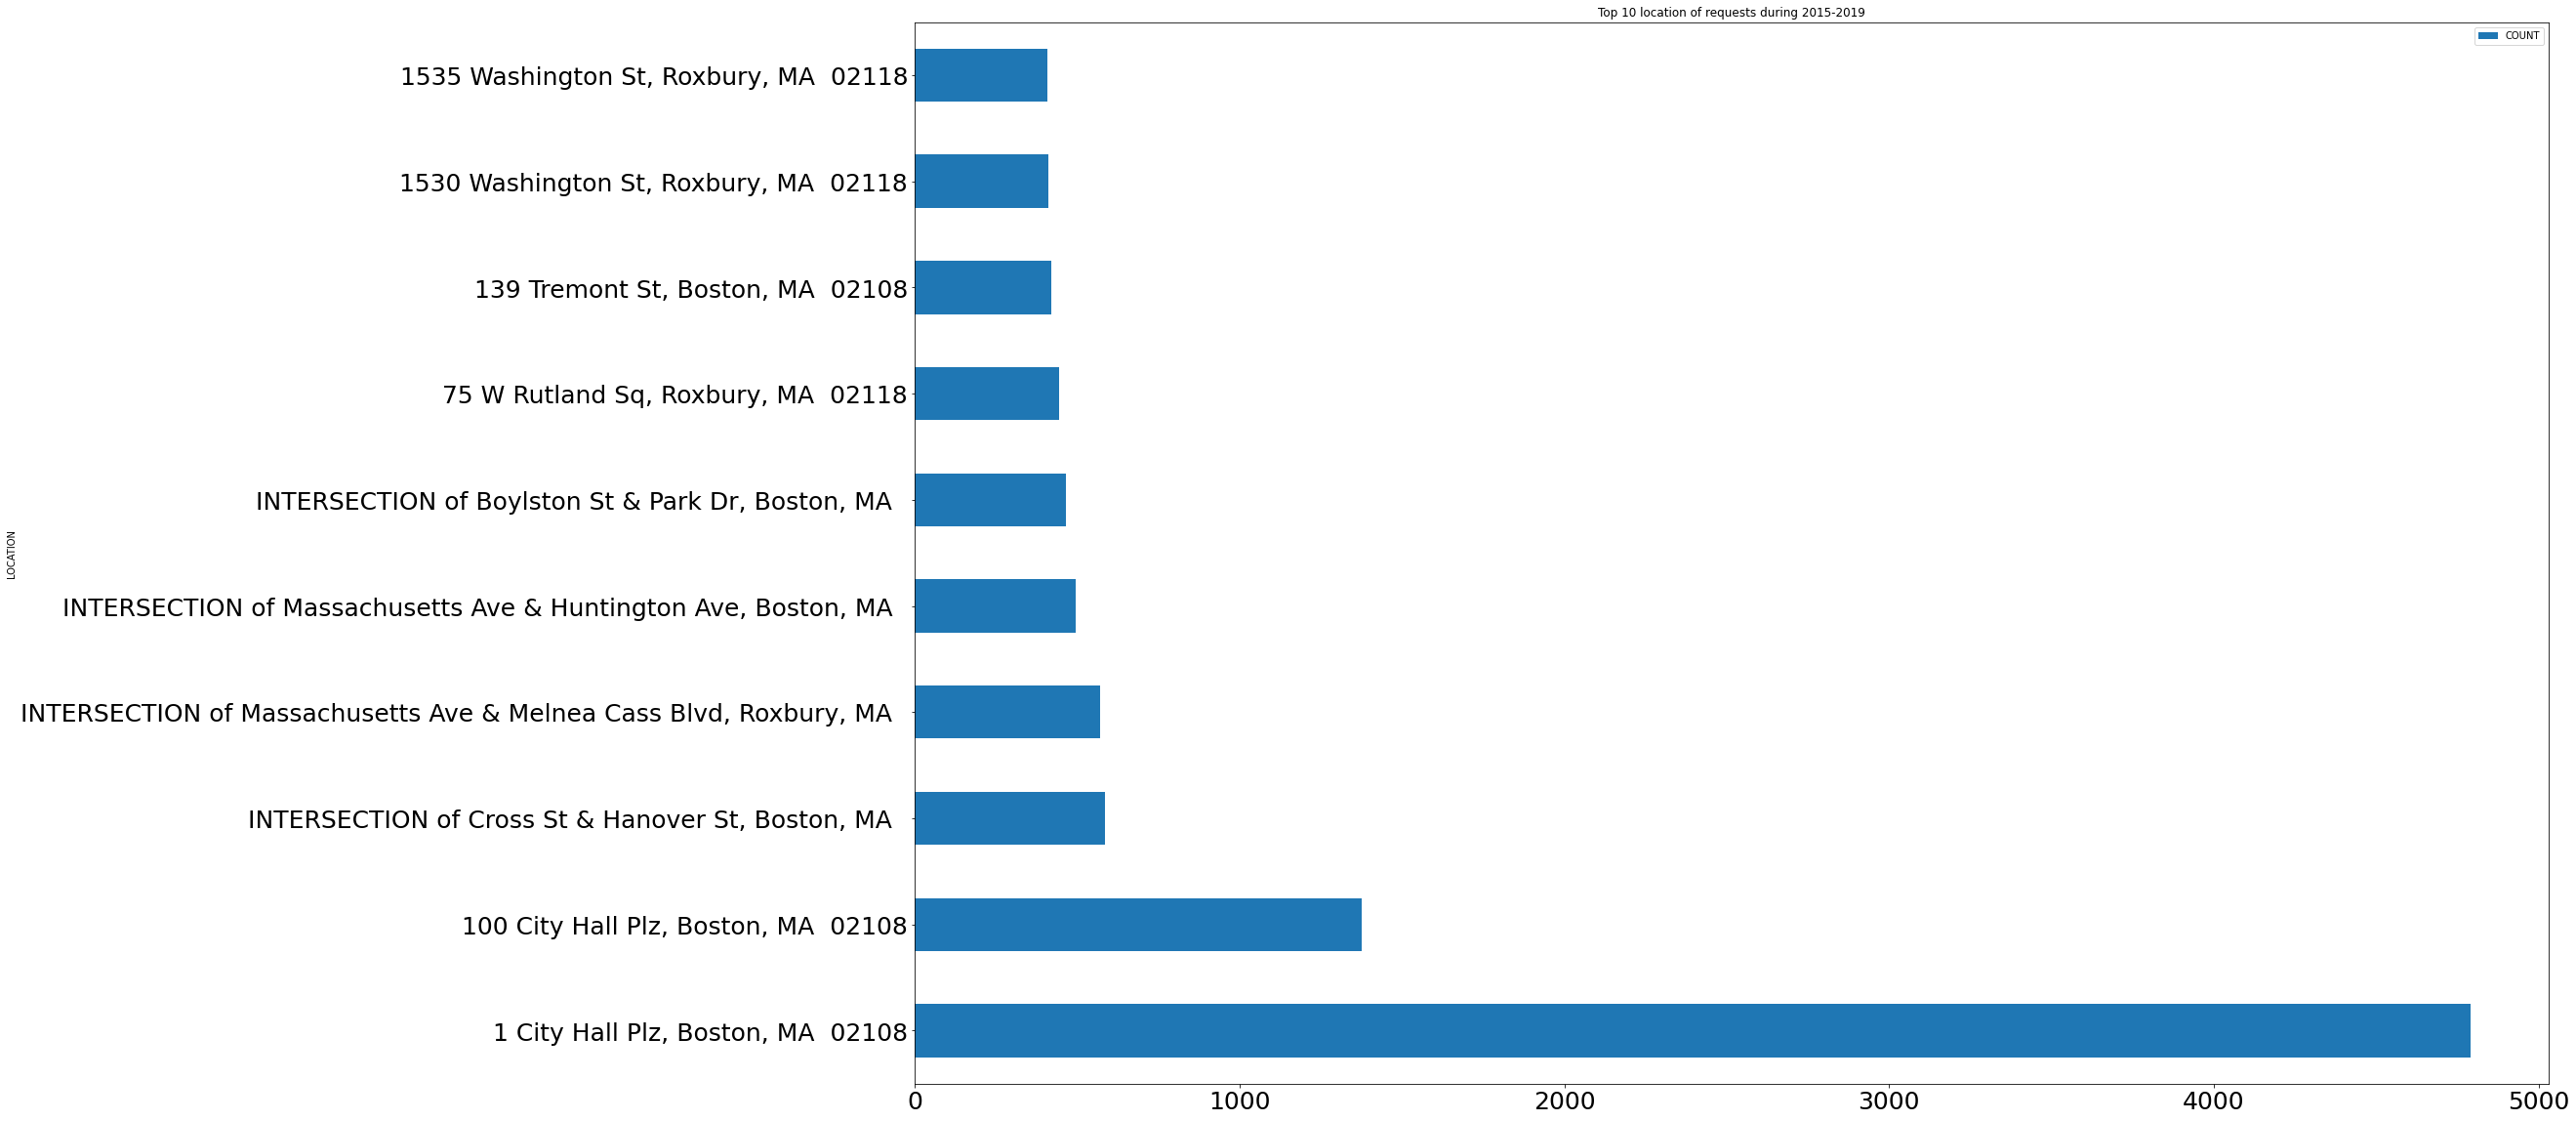

In [39]:
top_10_plot_post_covid = top_10_locations_pre_covid.plot.barh(x='LOCATION', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 location of requests during 2015-2019")

In [14]:
post_covid_location = group_and_count(post_covid_records, 'LOCATION')
print("\nTop 10 locations with highest number of complaints during 2020-2021")
top_10_locations_post_covid = post_covid_location.head(10)
top_10_locations_post_covid


Top 10 locations with highest number of complaints during 2020-2021


,LOCATION,COUNT,Percentage
133,"1 City Hall Plz, Boston, MA 02108",1533,0.513050
1925,"100 City Hall Plz, Boston, MA 02108",339,0.113453
16105,"160 Southampton St, Roxbury, MA 02118",226,0.075636
65056,"75 W Rutland Sq, Roxbury, MA 02118",204,0.068273
54121,"544P Massachusetts Ave, Roxbury, MA 02118",198,0.066265
14506,"1535 Washington St, Roxbury, MA 02118",197,0.065930
75320,"INTERSECTION of Chandler St & Cazenove St, Bos...",190,0.063587
75515,"INTERSECTION of Claremont St & Wellington St, ...",147,0.049197
78605,INTERSECTION of Massachusetts Ave & Melnea Cas...,143,0.047858
14495,"1530 Washington St, Roxbury, MA 02118",140,0.046854


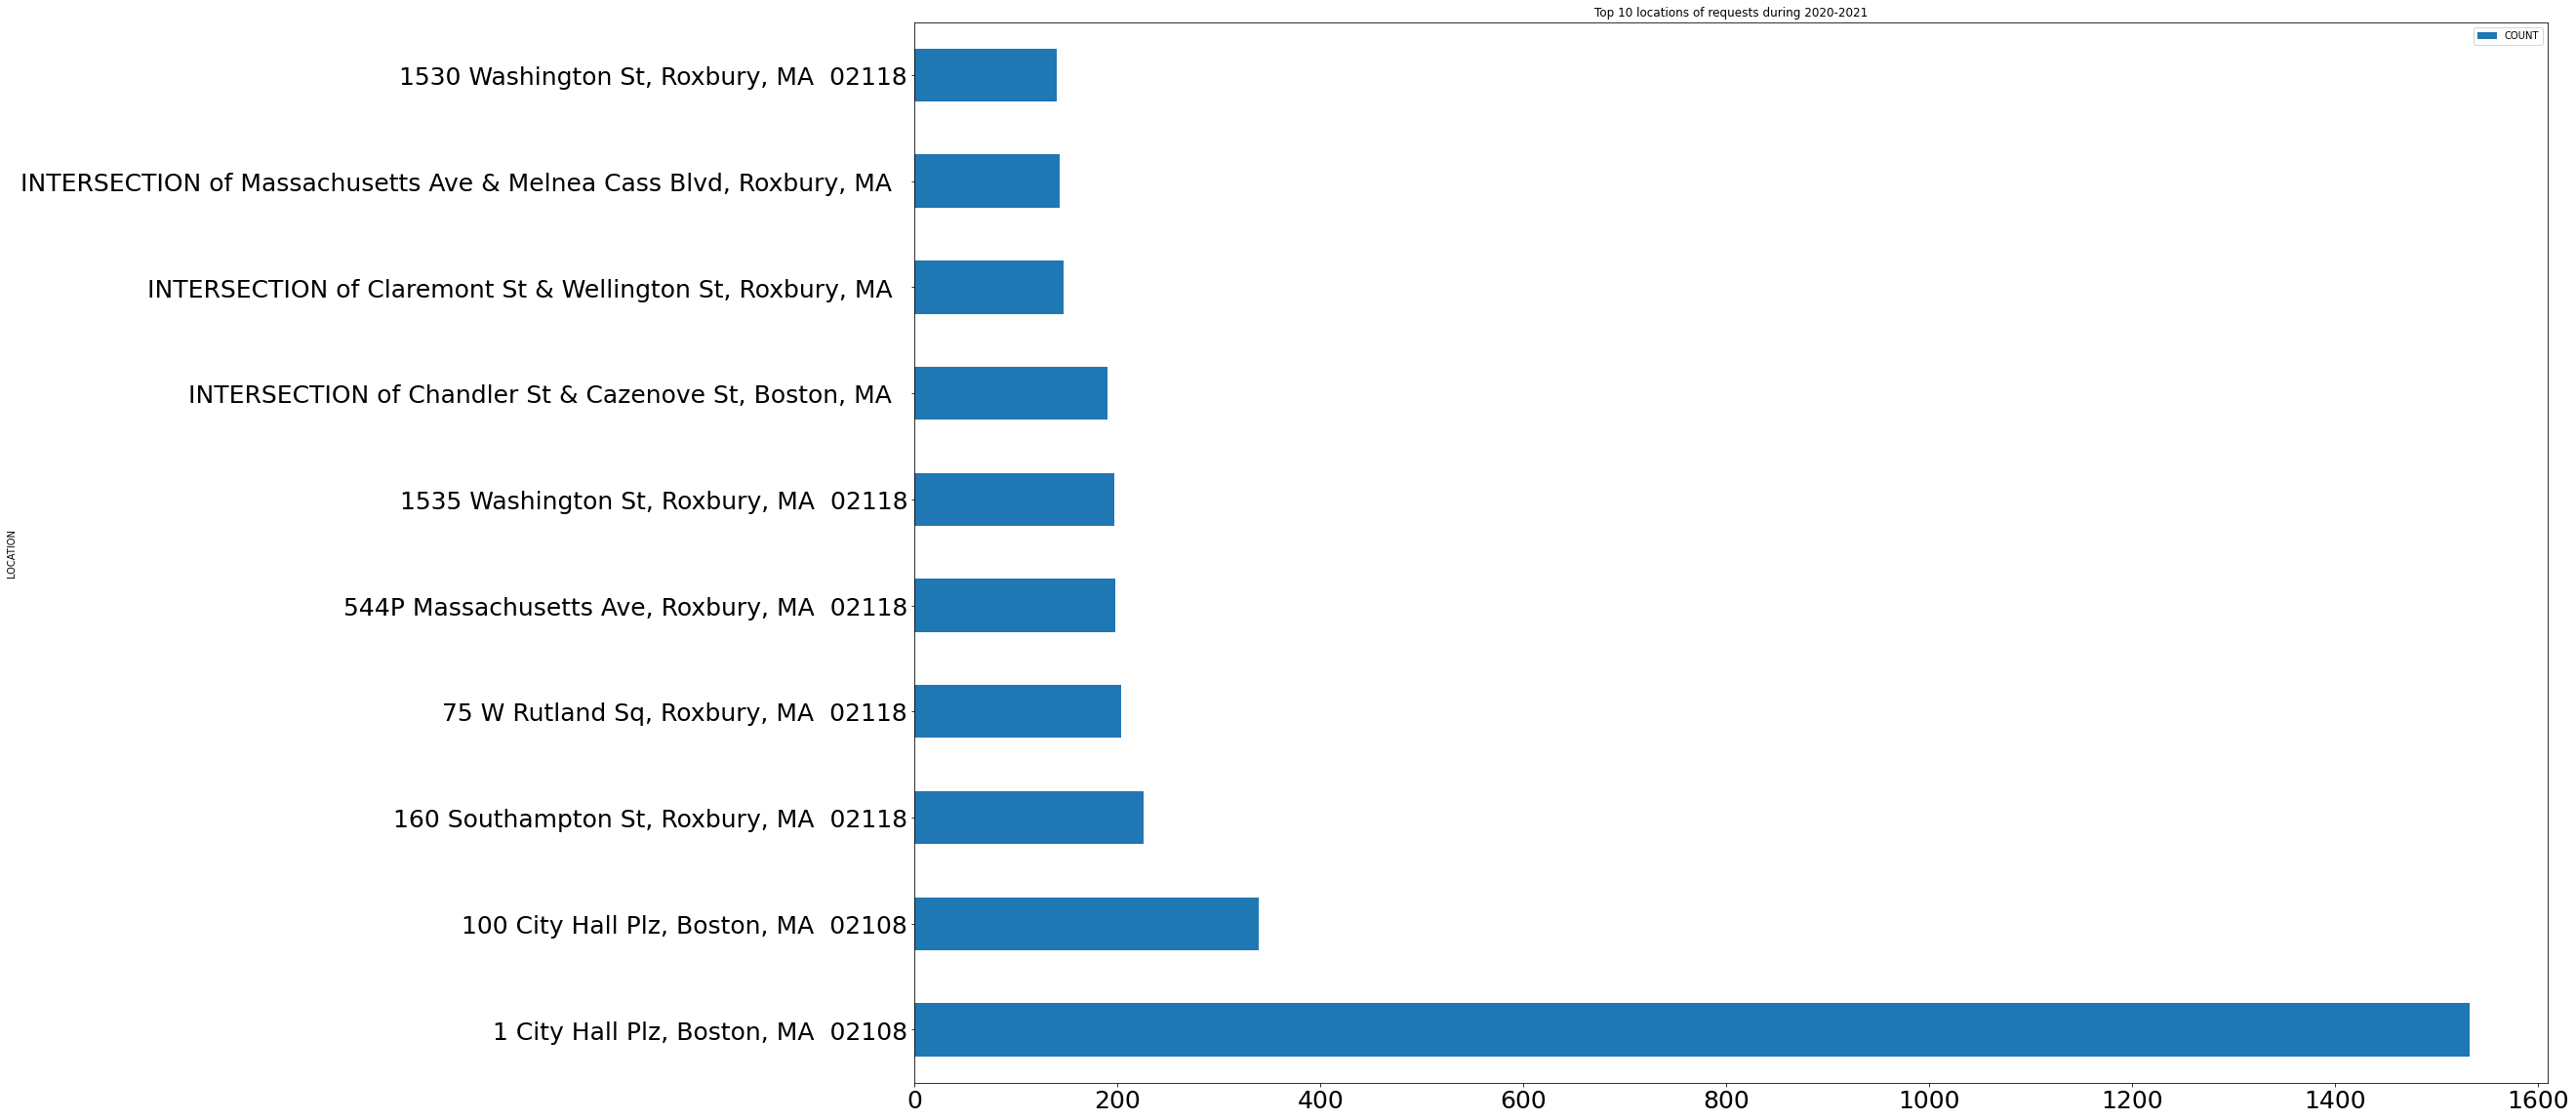

In [41]:
top_10_plot_post_covid = top_10_locations_post_covid.plot.barh(x='LOCATION', y='COUNT', rot=0,
                                              figsize=(30,20), fontsize = 25,
                                              title="Top 10 locations of requests during 2020-2021")

In [16]:
def get_season(month):
    seasons = {'SPRING': [3,4,5], 'SUMMER': [6,7,8], 'FALL': [9,10,11], 'WINTER': [12,1,2]}
    for season, months in seasons.items():
        if month in months:
            return season

post_covid_season = post_covid_records.copy()
pre_covid_records['OPEN_SEASON'] = pre_covid_records['OPEN_MONTH'].apply(lambda entry : get_season(entry))
post_covid_records['OPEN_SEASON'] = post_covid_records['OPEN_MONTH'].apply(lambda entry : get_season(entry))
# Another way of applying function to every entry of a column
# post_covid_records['SEASON'] = post_covid_records.apply(lambda row : get_season(row['OPEN_MONTH']), axis = 1)
# print(post_covid_records.iloc[0:11])
# print(post_covid_records.iloc[75000:75010])
# print(post_covid_records.iloc[150000:150011])
# print(post_covid_records.iloc[225000:225011])

In [20]:
pre_covid_season = group_and_count(pre_covid_records, 'OPEN_SEASON')
print("Complaints by Seasons during 2015-2019")
pre_covid_season

Complaints by Seasons during 2015-2019


,OPEN_SEASON,COUNT,Percentage
2,SUMMER,378523,26.657469
1,SPRING,355632,25.045371
3,WINTER,349713,24.628526
0,FALL,336083,23.668634


In [32]:
#pre_covid_season = pre_covid_season.set_index('OPEN_SEASON')
#pre_covid_season_plot = pre_covid_season.plot.pie(y='Percentage', figsize=(10, 10))
post_covid_season = group_and_count(post_covid_records, 'OPEN_SEASON')
print("\nComplaints by Seasons during 2020-2021")
post_covid_season
# Observe that the 311 cases during SPRING 2020 dropped by a significant margin compared to SPRING 2015-2019
# This could be the reason behind increase of cases in SUMMER 2020 and FALL 2020


Complaints by Seasons during 2020-2021


,OPEN_SEASON,COUNT,Percentage
2,SUMMER,90576,29.879757
0,FALL,80698,26.621142
3,WINTER,70095,23.123361
1,SPRING,61766,20.375740


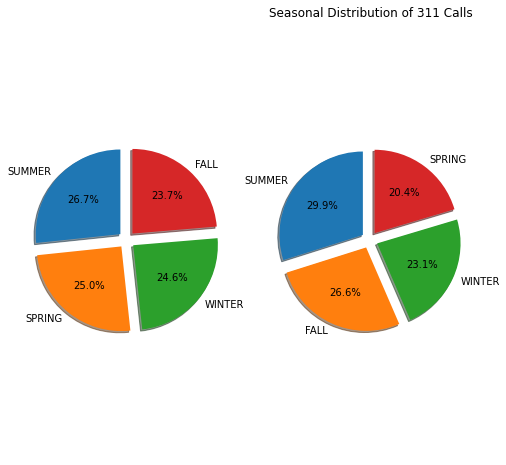

In [35]:
fig1, (pre_covid_season_plot,post_covid_season_plot) = plt.subplots(1,2,figsize=(8,8))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pre_covid_season['OPEN_SEASON']
sizes = pre_covid_season['Percentage']
explode = (0.1, 0.1, 0.1, 0.1)  # Seperates each slice of pie chart
pre_covid_season_plot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
pre_covid_season_plot.axis('equal')  # Draw pie plot as perfect circle with constant radii
#pre_covid_season_plot.set_size_inches(4,4)

labels = post_covid_season['OPEN_SEASON']
sizes = post_covid_season['Percentage']
explode = (0.1, 0.1, 0.1, 0.1)  
post_covid_season_plot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
post_covid_season_plot.axis('equal')  
plt.title('Seasonal Distribution of 311 Calls')
plt.show()

In [ ]:
#post_covid_season = post_covid_season.set_index('OPEN_SEASON')
#post_covid_season_plot = post_covid_season.plot.pie(y='Percentage', figsize=(5, 5))

In [ ]:
pre_covid_records['OPEN_DT'] = pd.to_datetime(pre_covid_records['OPEN_DT'])
pre_covid_records['CLOSED_DT'] = pd.to_datetime(pre_covid_records['CLOSED_DT'])
#pre_covid_records.dtypes

In [ ]:
post_covid_records['OPEN_DT'] = pd.to_datetime(post_covid_records['OPEN_DT'])
post_covid_records['CLOSED_DT'] = pd.to_datetime(post_covid_records['CLOSED_DT'])
#post_covid_records.dtypes

In [ ]:
def resolution_time(df):
        df['Resolution time'] = (df['CLOSED_DT'] - df['OPEN_DT']).dt.days
        return df

In [ ]:
resolution_time(pre_covid_records)

In [ ]:
resolution_time(post_covid_records)